# Ahmad Sharif
***K436765***

***Exercise 11***

***DATA.STAT.840 Statistical Methods for Text Data Analysis***

[nltk_data] Downloading package stopwords to /home/ahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/ahmad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


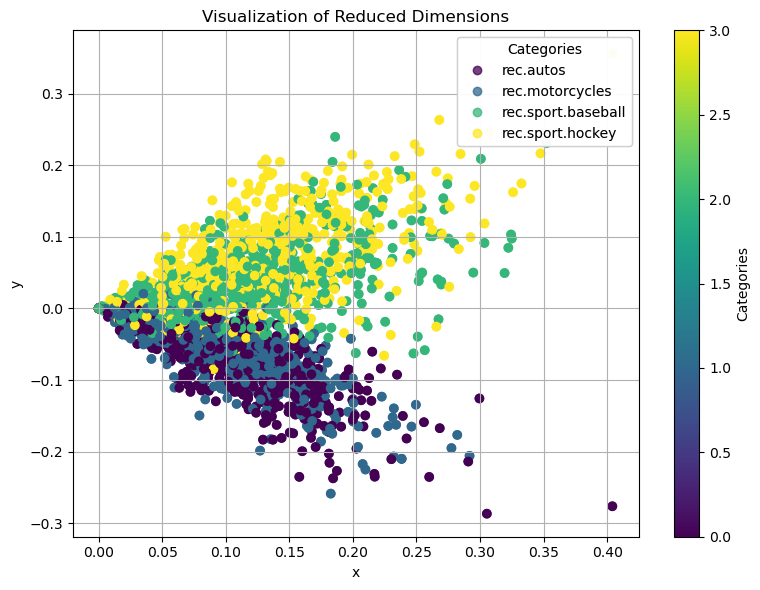

In [26]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
import sklearn
import sklearn.decomposition  
import sklearn.manifold
nltk.download('stopwords')
import gensim
import numpy, hmmlearn, hmmlearn.hmm


stop_words = 'english'  

categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

newsgroups_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))


tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000) 
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups_data.data)

n_components = 100

svd = TruncatedSVD(n_components=n_components, random_state=42)
lsa_matrix = svd.fit_transform(tfidf_matrix)

num_clusters = 4  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(lsa_matrix)
    
category_names = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=newsgroups_data.target, cmap='viridis', alpha=0.7)


legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=category_names, title='Categories', loc='upper right')
plt.gca().add_artist(legend1)  

plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1], c=newsgroups_data.target)
plt.title('Visualization of Reduced Dimensions')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Categories')

plt.grid(True)
plt.tight_layout()
plt.show()

According to graph, Baseball and Hockey has correlated. Additionally,  autos and motorcycles meet in same region.

Exercise 11.2: t-SNE plot of four newsgroups. Using the same data as in exercise 6.1 (four
newsgroups), use the t-distributed stochastic neighbor embedding (t-SNE) method to reduce the TF-
IDF vectors of the documents (as computed in exercise 6.1) to two dimensions.
Plot the resulting two-dimensional vectors; plot the documents of the different four newsgroups
with different colors. Discuss the results: does the t-SNE plot tell something about the distribution
of the document features?
You can use the Python implementation discussed on the lecture (lecture 11, slide 7), or another
language/library of your choice.

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.950615
[t-SNE] KL divergence after 400 iterations: 0.702027


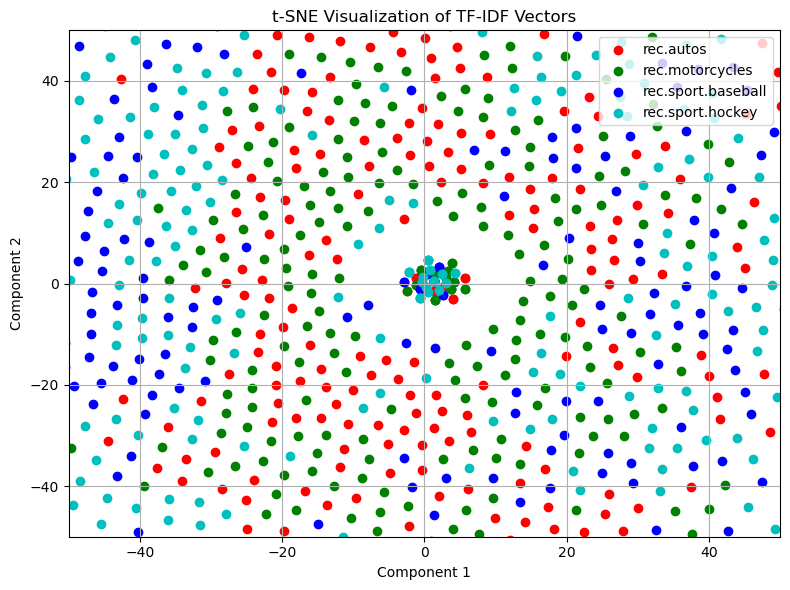

In [24]:
subset_indices = np.random.permutation(tfidf_matrix.shape[0])[:1000]
X_small = tfidf_matrix[subset_indices, :].toarray()

tsne_model = sklearn.manifold.TSNE(n_components=2, verbose=1, perplexity=20, n_iter=400)
tsne_plot = tsne_model.fit_transform(X_small)

plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'c'] 
for i, category in enumerate(newsgroups_data.target_names):
    indices = np.where(newsgroups_data.target[subset_indices] == i)
    plt.scatter(tsne_plot[indices, 0], tsne_plot[indices, 1], c=colors[i], label=category)

plt.title('t-SNE Visualization of TF-IDF Vectors')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.axis([-50, 50, -50, 50])

# Show the plot
plt.show()

Exercise 11.3: Word embedding. In this exercise we use the same data as in exercise 8.1
(provided in "hmm_sentences.txt" for that exercise, one sentence per line, and also in the current
exercise package; in the current package we also provide a subdirectory "hmm_sentences" with the
same data as separate files for each sentence). Note: you do not need to prune the vocabulary of
these texts since it is so small already.
Using the gensim library as in lecture 11 slide 24, or using another language/library of your choice,
create 5-dimensional word2vec embeddings for the data. Use a window size of 3 words.
Report the resulting embeddings (vectors) for the words "where", "dog", and "explain".

In [29]:

with open('hmm_sentences.txt', 'r') as file:
    sentences = [line.strip() for line in file.readlines()]

sentences_tokenized = [sentence.split() for sentence in sentences]

word2vec_model = gensim.models.Word2Vec(sentences=sentences_tokenized, vector_size=5, window=3, min_count=1)
words_to_check = ["where", "dog", "explain"]
for word in words_to_check:
    if word in word2vec_model.wv.key_to_index:
        print(f"Word: {word} - Embedding: {word2vec_model.wv[word]}")
    else:
        print(f"Word: {word} - Embedding: Word not found in vocabulary")


Word: where - Embedding: [-0.3539674   0.97975016  0.63945335 -0.6262694   0.7030814 ]
Word: dog - Embedding: [-0.10397124  1.0345687   0.56981754 -0.32818294  0.7225344 ]
Word: explain - Embedding: [-0.09556364  1.0061413   0.8269282  -0.29617968  0.7786528 ]
